<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

%matplotlib inline

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Чтобы результаты были воспроизводимы между запусками ноутбука`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [4]:
def get_columns_with_na(df):
    return df.columns[df.isna().sum() > 0]

print('Columns with na:')
print(*get_columns_with_na(df_train), sep=', ')

Columns with na:
mileage, engine, max_power, torque, seats


In [5]:
def get_duplicates(df):
    df = df.copy()
    columns = list(df.columns)
    df['tmp'] = 1
    groupby = df.groupby(columns)
    return groupby.count()[groupby['tmp'].count() > 1]

print('Duplicates:')
get_duplicates(df_train)

Duplicates:


,,,,,,,,,,,,,tmp
name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,
Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0,2
Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0,2
Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0,6
BMW 3 Series 320d Luxury Line,2012,1300000,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0,2
BMW 3 Series 320d Luxury Line Plus,2017,2600000,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen Polo 2015-2019 1.0 MPI Trendline,2018,560000,14495,Petrol,Dealer,Manual,First Owner,18.78 kmpl,999 CC,75 bhp,95Nm@ 3000-4300rpm,5.0,2
Volkswagen Polo 2015-2019 1.5 TDI Highline Plus,2018,650000,40000,Diesel,Dealer,Manual,First Owner,20.14 kmpl,1498 CC,88 bhp,230Nm@ 1500-2500rpm,5.0,2
Volkswagen Vento 1.5 TDI Highline AT,2016,1000000,60000,Diesel,Individual,Automatic,First Owner,22.15 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0,2


In [6]:
from ydata_profiling import ProfileReport
ProfileReport(df_train, title="Profiling Report").to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

`Тип коробки, год, пробег сильно коррелируют со стоимостью машины`

`Есть много дубликатов`

`Категориальные переменные несбалансированы`


### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [7]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [9]:
print('Train mean:')
print(df_train.select_dtypes(include='number').mean())

print('\nTest mean:')
print(df_test.select_dtypes(include='number').mean())

print('\nMean difference:')
print(df_train.select_dtypes(include='number').mean() - df_test.select_dtypes(include='number').mean())

print('\nMedian difference:')
print(df_train.select_dtypes(include='number').median() - df_test.select_dtypes(include='number').median())

Train mean:
year               2013.818403
selling_price    639515.197171
km_driven         69584.615517
seats                 5.419008
dtype: float64

Test mean:
year               2013.681000
selling_price    617901.042000
km_driven         71393.341000
seats                 5.410805
dtype: float64

Mean difference:
year                 0.137403
selling_price    21614.155171
km_driven        -1808.725483
seats                0.008203
dtype: float64

Median difference:
year                 1.0
selling_price    15001.0
km_driven        -1500.0
seats                0.0
dtype: float64


`По одной только разницы значений средних и медиан нельзя сделать выводы`

`Если рассматривать относительную разницу, то вроде все нормально`

`Корректнее было бы смотреть на распределения значений`

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [10]:
duplicates = get_duplicates(df_train.drop('selling_price', axis=1))
print(f'Number of duplicates: {len(duplicates)}')
print(duplicates)

Number of duplicates: 624
                                                                                                                                                                     tmp
name                                            year km_driven fuel   seller_type transmission owner        mileage    engine  max_power  torque              seats     
Audi Q3 2.0 TDI Quattro Premium Plus            2017 22000     Diesel Dealer      Automatic    First Owner  15.73 kmpl 1968 CC 174.33 bhp 380Nm@ 1750-2500rpm 5.0      2
Audi Q5 3.0 TDI Quattro                         2014 76131     Diesel Individual  Automatic    First Owner  13.22 kmpl 2967 CC 241.4 bhp  580Nm@ 1400-3250rpm 5.0      2
Audi Q5 35TDI Premium Plus                      2018 31800     Diesel Dealer      Automatic    First Owner  17.01 kmpl 1968 CC 188 bhp    400nm@ 1750-3000rpm 5.0      6
BMW 3 Series 320d Luxury Line                   2012 140000    Diesel Individual  Automatic    Second Owner 18.88 kmpl 1995 CC 18

In [11]:
df_train = df_train.drop_duplicates(subset=df_train.drop('selling_price', axis=1).columns, keep='first').reset_index(drop=True)

In [12]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [13]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [14]:
df_train[['mileage', 'engine', 'max_power', 'torque']]

,mileage,engine,max_power,torque
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
3,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
4,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm
...,...,...,...,...
5835,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm
5836,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm
5837,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
5838,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"


In [15]:
import re

def preprocess_torque(df):
    def split_torque(torque):
        if pd.isna(torque):
            return np.nan, np.nan
        
        torque = torque.lower().replace(',', '').replace(' kgm at', 'kgm@').replace('nm at', 'nm@').replace('/', '').replace('  ', ' ').strip()
        G = 9.81
        float_number = '(\d+(\.\d+)?)'
        min_max_rpm = f'(({float_number}[-~])?{float_number})'
        # print(torque)


        pattern = f'{float_number} ?(nm)?@? {min_max_rpm} ?(rpm)?'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1))
            rpm = float(match.group(8))
            # print('   ', torque, rpm)
            return torque, rpm
        
        pattern = f'{float_number}kgm@ {min_max_rpm} ?rpm'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1)) * G
            rpm = float(match.group(7))
            # print('   ', torque, rpm)
            return torque, rpm
        
        pattern = f'{float_number}@ {min_max_rpm}\(kgm@ rpm\)'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1)) * G
            rpm = float(match.group(7))
            # print('   ', torque, rpm)
            return torque, rpm
        
        pattern = f'{float_number}nm'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1))
            rpm = np.nan
            # print('   ', torque, rpm)
            return torque, rpm
        
        # 380nm(38.7kgm)@ 2500rpm
        pattern = f'{float_number}nm\({float_number}kgm\)@ {min_max_rpm} ?rpm'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1))
            rpm = float(match.group(9))
            # print('   ', torque, rpm)
            return torque, rpm
        
        # 51nm@ 4000+-500rpm
        pattern = f'{float_number}nm@ {float_number}\+-{float_number} ?rpm'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1))
            rpm = float(match.group(3)) + float(match.group(5))
            # print('   ', torque, rpm)
            return torque, rpm
        
        # 48@ 3000+-500(nm@ rpm)
        pattern = f'{float_number}@ {float_number}\+-{float_number}\(nm@ rpm\)'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1))
            rpm = float(match.group(3)) + float(match.group(5))
            # print('   ', torque, rpm)
            return torque, rpm
        
        # 110(11.2)@ 4800
        pattern = f'{float_number}\({float_number}\)@ {min_max_rpm}'
        match = re.fullmatch(pattern, torque)
        if match:
            # print('   ', match.groups())
            torque = float(match.group(1))
            rpm = float(match.group(9))
            # print('   ', torque, rpm)
            return torque, rpm
        
        raise ValueError(f'Unknown pattern: {torque}')
    
    df = df.copy()
    df['torque'], df['max_torque_rpm'] = zip(*df['torque'].apply(split_torque))
    return df


def preprocess_data(df):
    df = df.copy()
    df['mileage'] = df['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
    df['max_power'] = df['max_power'].str.replace(' bhp', '').apply(lambda x: float(x) if x else np.nan)
    df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

    df = preprocess_torque(df)
    return df


df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

In [16]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.744,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.815,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750,5.0,4000.0


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [17]:
def fill_na_medians(df_train, df_test):
    df_train = df_train.copy()
    df_test = df_test.copy()

    medians = df_train.select_dtypes(include='number').median()
    for column in df_train.isna().sum()[df_train.isna().sum() > 0].index:
        df_train[column] = df_train[column].fillna(medians[column])
        df_test[column] = df_test[column].fillna(medians[column])

    return df_train, df_test, medians

df_train_filled, df_test_filled, medians = fill_na_medians(df_train, df_test)

In [19]:
import pickle

pickle.dump(medians, open('medians.pkl', 'wb'))

`Медиана более устойчива к выбросам, чем среднее. Поэтому лучше использовать медиану, но в приципе можно было бы использовать и среднее`

`На момент обучения модели мы не знаем, какие значения будут в тесте, поэтому считать медиану нужно по тренировочным данным`


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [24]:
df_train_filled[['engine', 'seats']].head()

,engine,seats
0,1248.0,5.0
1,1498.0,5.0
2,1396.0,5.0
3,1298.0,5.0
4,1197.0,5.0


In [22]:
def cast_fields(df):
    df = df.copy()

    df['seats'] = df['seats'].astype(int)

    df['engine'] = df['engine'].astype(int)

    return df

df_train_filled = cast_fields(df_train_filled)
df_test_filled = cast_fields(df_test_filled)



In [23]:
df_train_filled['seats'].value_counts()

seats
5     4618
7      800
8      191
4       94
9       68
6       48
10      18
2        2
14       1
Name: count, dtype: int64

`Можно рассмотреть как категориальную, так как мало (9) уникальных значений`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [27]:
df_train_filled.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.362665,5.426712,3046.645205
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,107.161739,0.982344,912.076209
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.088000,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.124000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.900000,14.000000,21800.000000


`Ранее большинство признаков было в кривом формате - что-то понять сложно. Теперь все признаки числовые и их можно анализировать`

`Заполнение пропусков не должно было сильно влиять на распределения, среднее могло сдвинуться в сторону медианы, но не сильно - зависит от количества пропусков и наличия выбросов`

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

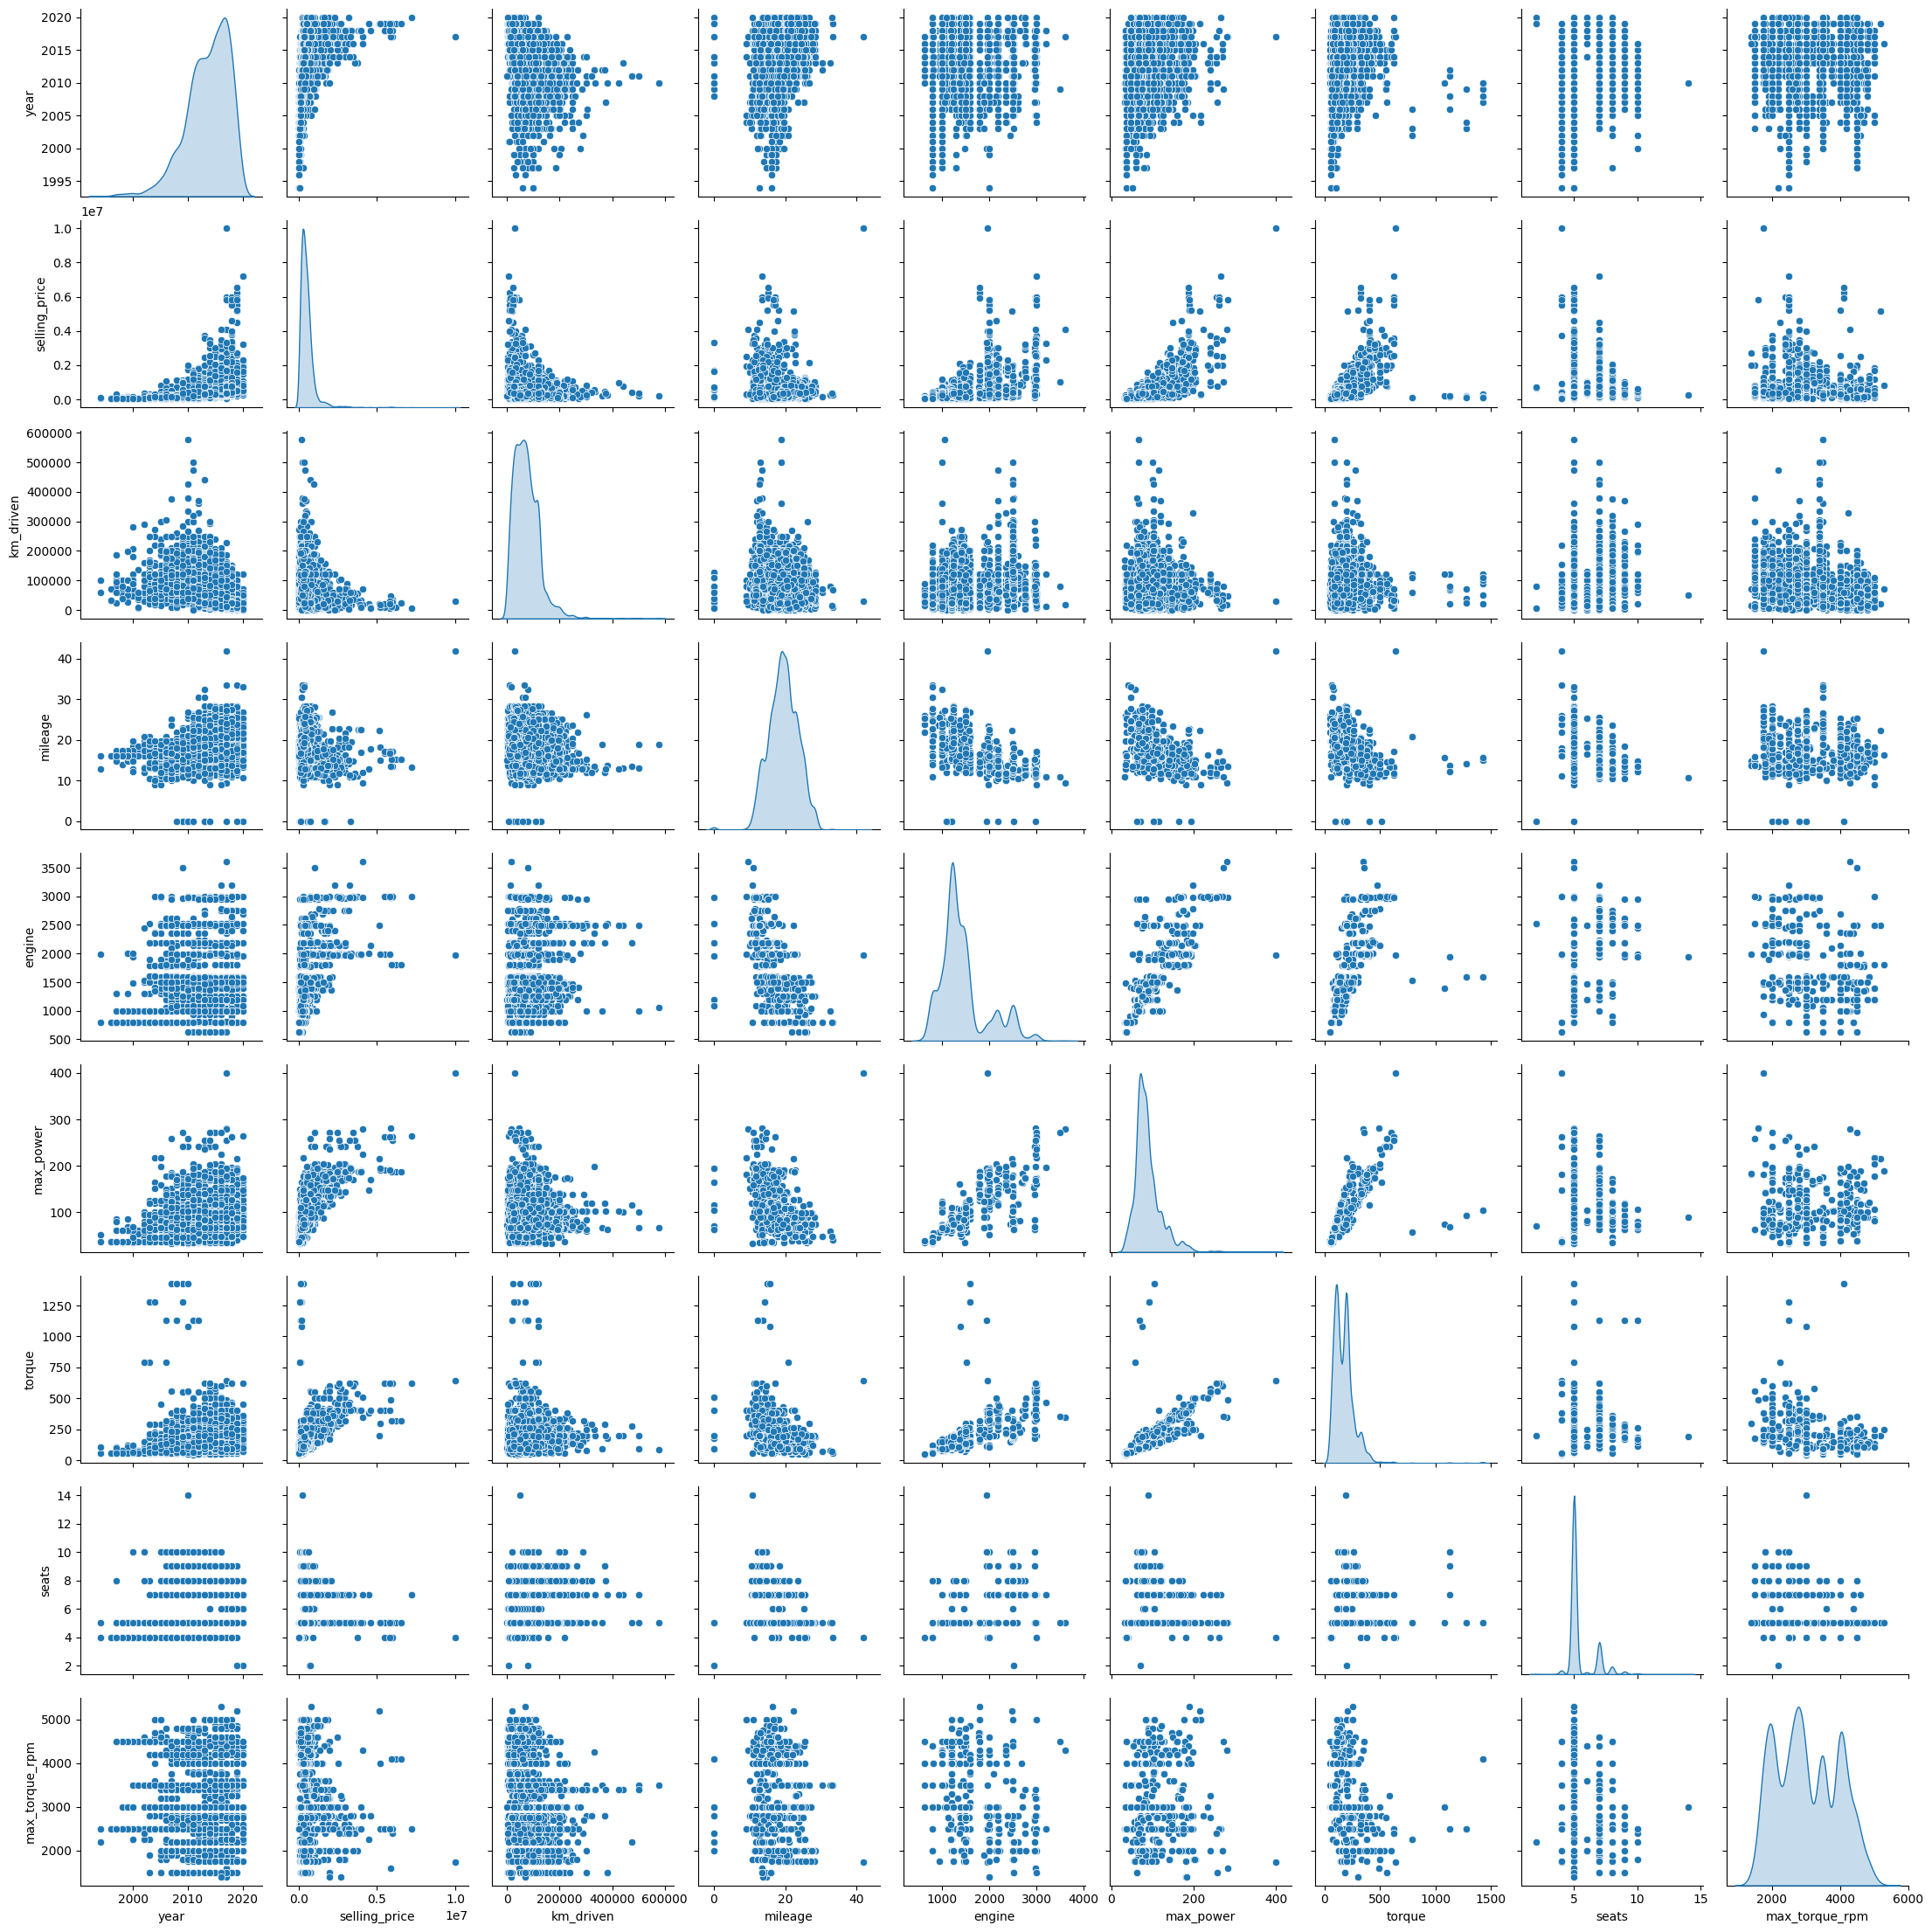

In [28]:
sns.pairplot(df_train[(df_train['max_torque_rpm'] < 10000) & (df_train['km_driven'] < 1e6)], diag_kind='kde')

`Можно предположить, что все цена может зависеть от всех признаков, кроме max_torque_rpm`

`Явно видны положительные корреляции между ценой и признаками engine, max_power, torque, а также engine и признаками max_power, torque`

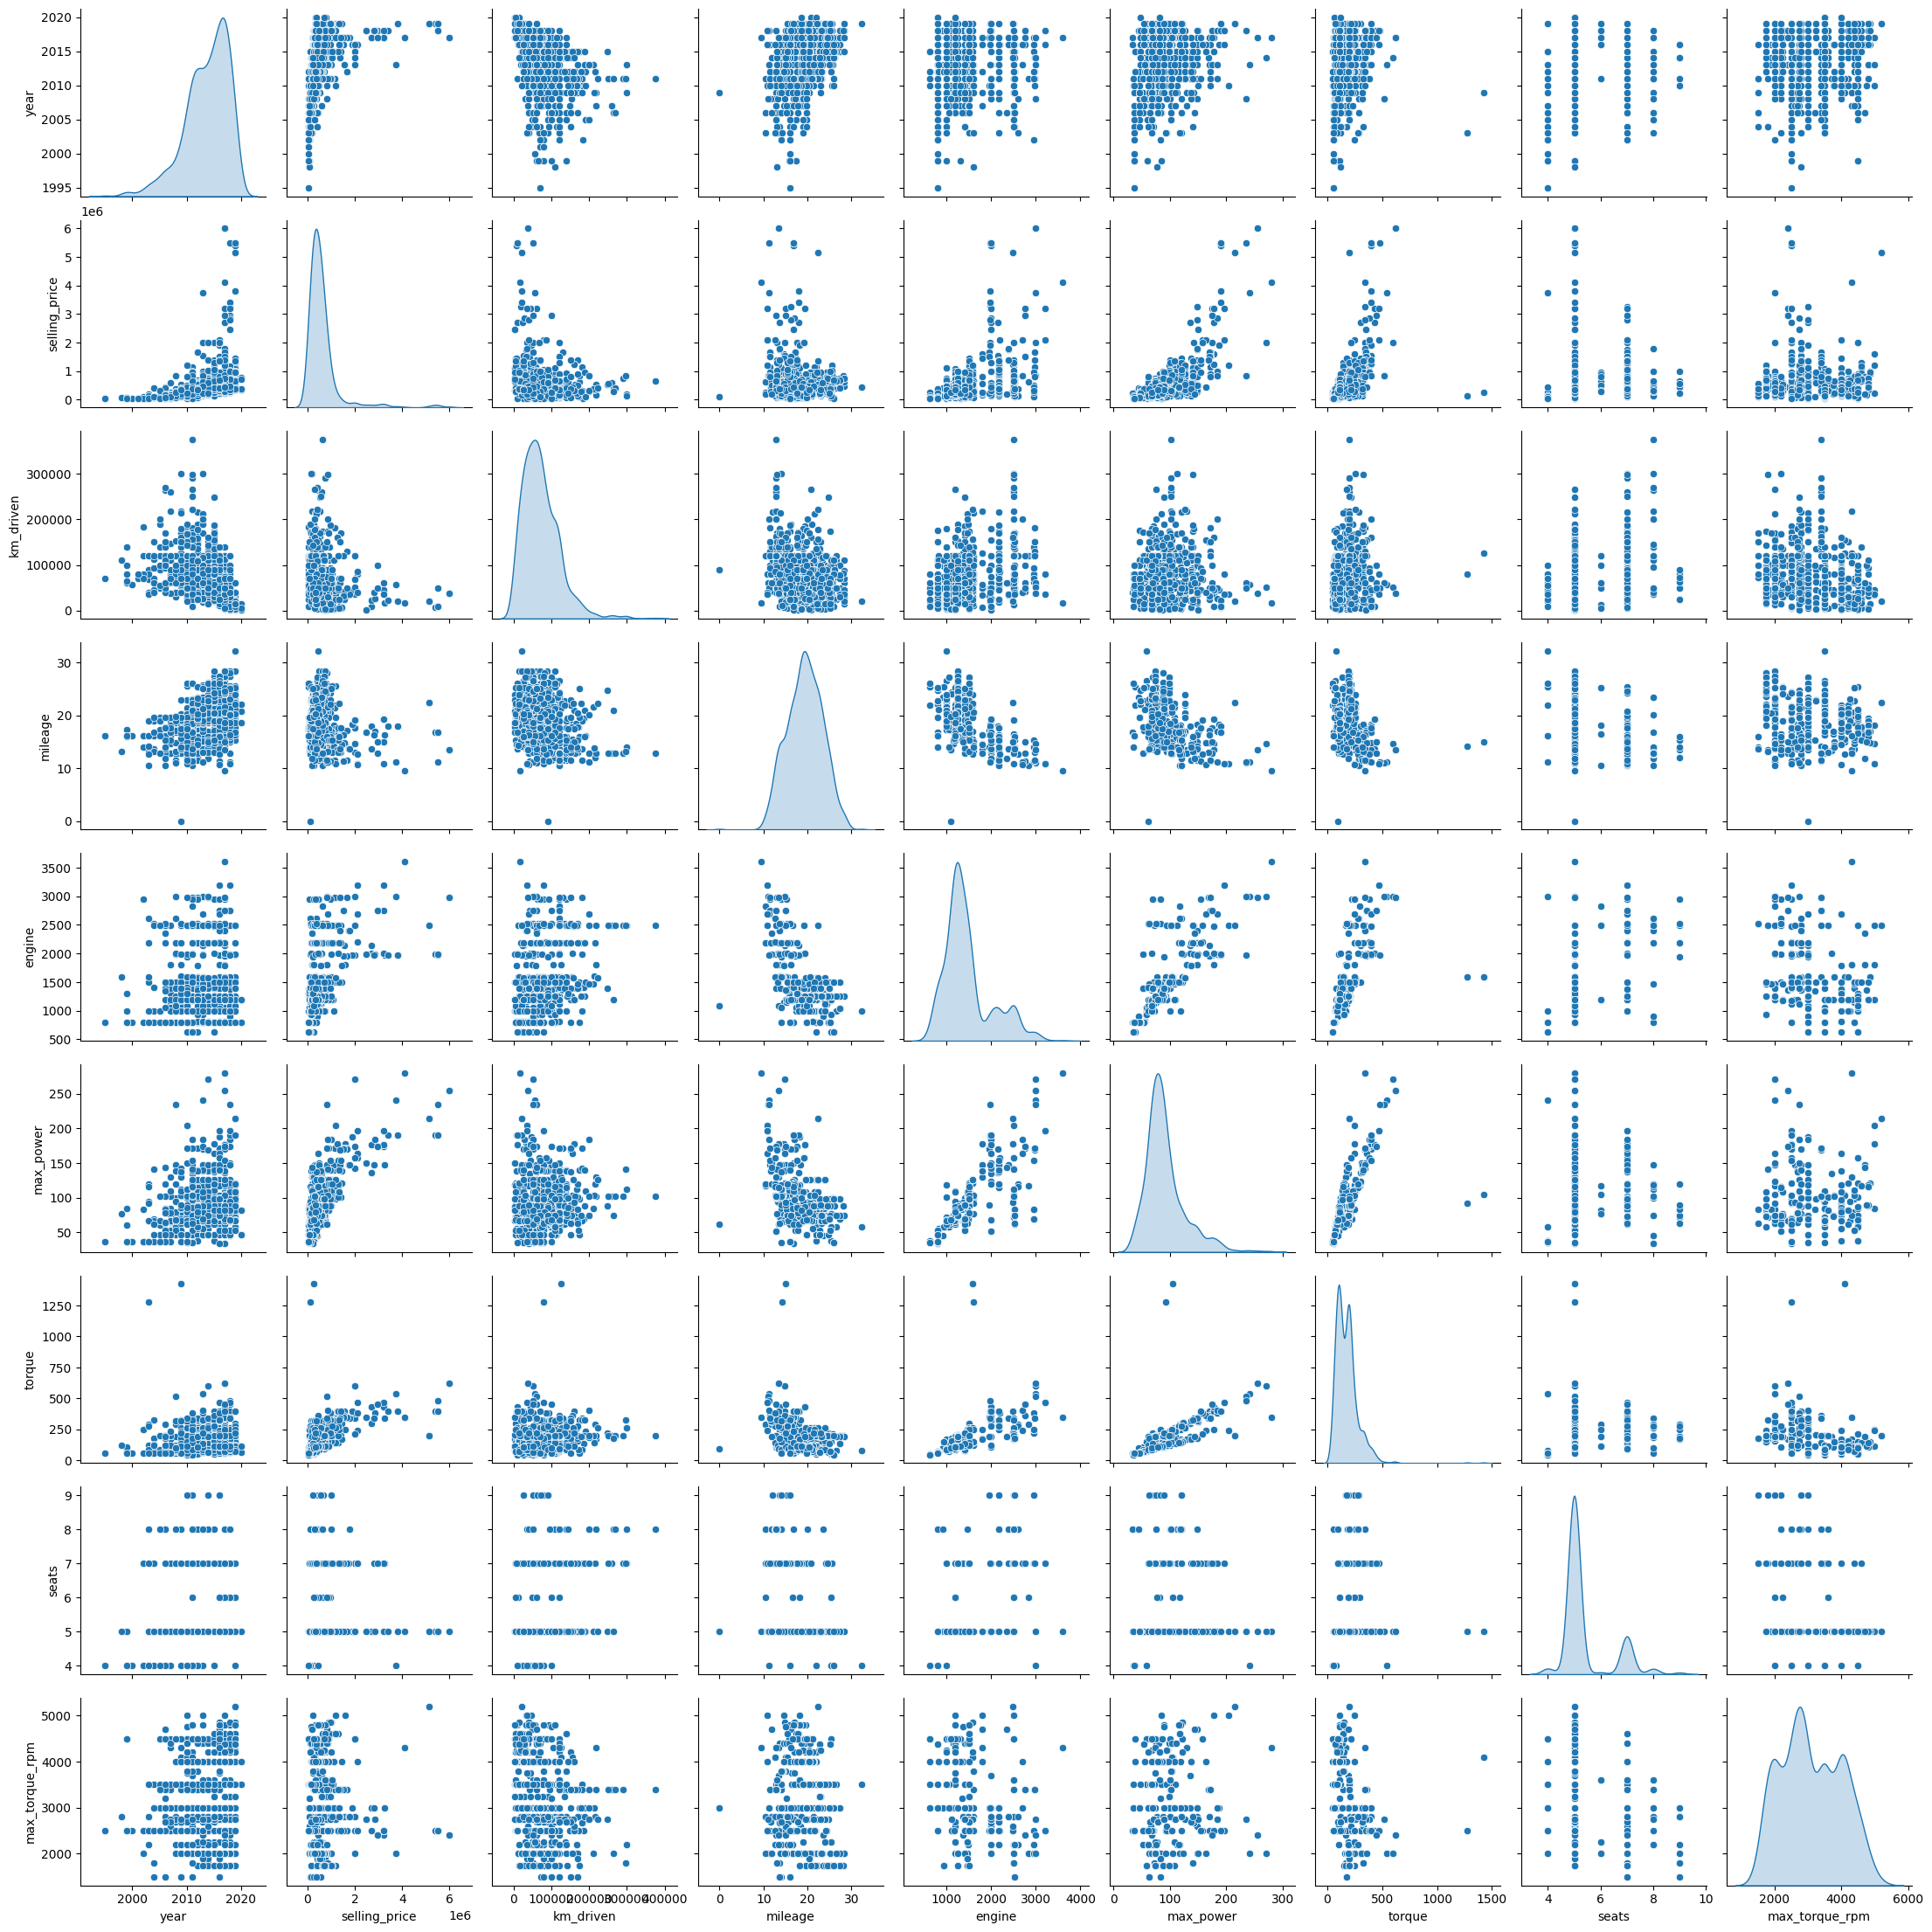

In [29]:
sns.pairplot(df_test, diag_kind='kde')

`За ислючением выбросов распределения признаков в трейне и тесте похожи`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

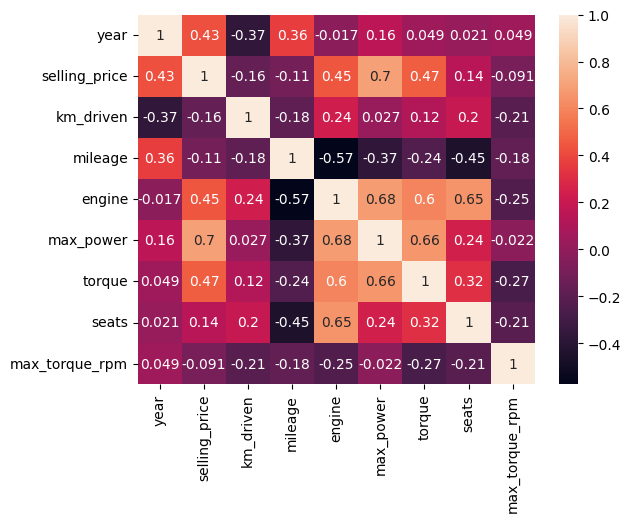

In [30]:
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [31]:
df_train_filled.select_dtypes(include='number').corr().unstack().sort_values().drop_duplicates()

engine          mileage          -0.572893
mileage         seats            -0.451059
                max_power        -0.373390
year            km_driven        -0.368966
torque          max_torque_rpm   -0.268808
max_torque_rpm  engine           -0.246207
torque          mileage          -0.237627
max_torque_rpm  seats            -0.207390
km_driven       max_torque_rpm   -0.204651
mileage         km_driven        -0.182086
                max_torque_rpm   -0.179445
selling_price   km_driven        -0.164828
mileage         selling_price    -0.104769
selling_price   max_torque_rpm   -0.088720
max_torque_rpm  max_power        -0.021474
year            engine            0.002819
max_power       km_driven         0.024588
year            seats             0.041178
max_torque_rpm  year              0.048432
torque          year              0.053084
km_driven       torque            0.112969
seats           selling_price     0.149953
max_power       year              0.156858
seats      

`Наименее скоррелированы между собой year и engine`

`Довольно сильная положительная линейная зависимость между selling_price и max_power`

`Да, можно сделать такое предположение, так как коэффициент корреляции между year и mileage отрицательный`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [33]:
def spearman_correlation(df):
    columns = df.select_dtypes(include='number').columns
    corr_df = pd.DataFrame(index=columns, columns=columns)
    for x_column in columns:
        for y_column in columns:
            rank_x = df[x_column].values.argsort(kind='stable').argsort()
            rank_y = df[y_column].values.argsort(kind='stable').argsort()
            corr_df.loc[x_column, y_column] = np.corrcoef(rank_x, rank_y)[0, 1]
    return corr_df

spearman_correlation(df_train_filled) - df_train_filled.select_dtypes(include='number').corr(method='spearman')


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,0.0,-0.001928,0.00586,0.002384,0.004385,0.000824,0.003061,0.026593,0.003925
selling_price,-0.001928,0.0,0.001034,0.000292,0.000182,0.00037,0.000363,-0.089632,0.001175
km_driven,0.00586,0.001034,0.0,0.001005,-0.000097,0.00032,0.000068,-0.012467,0.003801
mileage,0.002384,0.000292,0.001005,0.0,0.00236,0.000416,0.001286,0.142002,0.002291
engine,0.004385,0.000182,-0.000097,0.00236,0.0,-0.001368,-0.000745,-0.104444,0.00738
max_power,0.000824,0.00037,0.00032,0.000416,-0.001368,0.0,-0.000054,-0.074844,0.001753
torque,0.003061,0.000363,0.000068,0.001286,-0.000745,-0.000054,0.0,-0.093536,0.004662
seats,0.026593,-0.089632,-0.012467,0.142002,-0.104444,-0.074844,-0.093536,0.0,0.088561
max_torque_rpm,0.003925,0.001175,0.003801,0.002291,0.00738,0.001753,0.004662,0.088561,0.0


interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


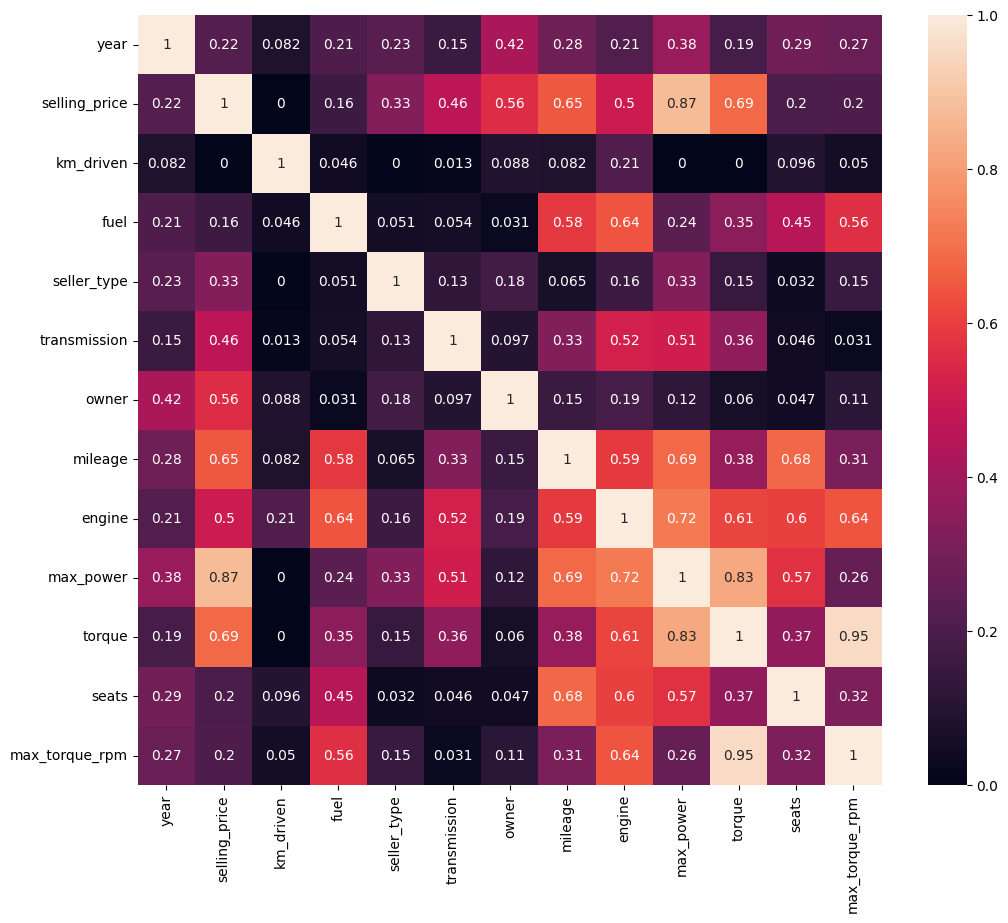

In [34]:
import phik
from phik import resources, report

phik_overview = df_train_filled.drop('name', axis=1).phik_matrix()
plt.figure(figsize=(12, 10))
sns.heatmap(phik_overview, annot=True);


`Некоторые различия в значениях корреляции могут быть связаны с алгоритмом вычисления рангов для совпадающих значений`

`Судя по матрице корреляции phik, наибольшая корреляция наблюдается между torque и max_torque_rpm`

`Как и в случае с корреляцией Пирсона, между ценой и признаками engine, max_power, torque наблюдается положительная корреляция`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [35]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [50]:
df_train_filled.to_csv('df_train.csv', index=False)
df_test_filled.to_csv('df_test.csv', index=False)

In [36]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

In [37]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include='number').drop(['year', 'engine', 'selling_price'], axis=1)

In [38]:
assert X_train.shape == (5840, 6)

In [39]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include='number').drop(['year', 'engine', 'selling_price'], axis=1)

In [40]:
assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

def fit_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)

    print('Train R2:', r2_score(y_train, y_train_pred))
    print('Train MSE:', MSE(y_train, y_train_pred))
    print('Train RMSE:', MSE(y_train, y_train_pred, squared=False))

    y_test_pred = model.predict(X_test)

    print('Test R2:', r2_score(y_test, y_test_pred))
    print('Test MSE:', MSE(y_test, y_test_pred))
    print('Test RMSE:', MSE(y_test, y_test_pred, squared=False))
    return model, y_test_pred

In [42]:
default_model, default_test_pred = fit_model(LinearRegression(), X_train, y_train, X_test, y_test)

Train R2: 0.5403387060723827
Train MSE: 131756549498.84833
Train RMSE: 362982.85014425725
Test R2: 0.5688153336672683
Test MSE: 247857258961.48874
Test RMSE: 497852.6478401905


`Сложно сказать, насколько хорошо модель обучилась, так как нет бейзлайна`

`R^2 = 0.55 не очень хорошо, но и не плохо`

`Если смотреть на R^2, то модель не переобучилась`

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [43]:
def R_squared(y_true, y_pred):
    """
    R^2 = 1 - SS_res / SS_tot,
    где SS_res = sum(y_true - y_pred)^2 - сумма квадратов остатков регрессии,
        SS_tot = sum(y_true - mean(y_true))^2 - дисперсия y_true.

    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot 

y_train_pred = default_model.predict(X_train)
y_test_pred = default_model.predict(X_test)
print('Train R2:', R_squared(y_train, y_train_pred))
print('Test R2:', R_squared(y_test, y_test_pred))


Train R2: 0.5403387060723827
Test R2: 0.5688153336672683


`Your answer here`

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [44]:
def adjusted_R_squared(y_true, y_pred, n, p):
    """
    n - количество объектов`,
    p - количество признаков.
    df_res = n - p - 1,
    df_tot = n - 1,

    R^2_adj = 1 - (1 - R^2) * df_tot / df_res.
    """
    df_res = n - p - 1
    df_tot = n - 1
    r_squared = R_squared(y_true, y_pred)
    return 1 - (1 - r_squared) * df_tot / df_res

print('Train adjusted R2:', adjusted_R_squared(y_train, y_train_pred, X_train.shape[0], X_train.shape[1]))
print('Test adjusted R2:', adjusted_R_squared(y_test, y_test_pred, X_test.shape[0], X_test.shape[1]))

Train adjusted R2: 0.5398658845802575
Test adjusted R2: 0.5662099882513606


`adjusted-R^2 применяется, когда в модели много признаков, чтобы побороть автоматическое увеличение метрики при добавлении новых признаков`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
scaled_model, scaled_test_pred = fit_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Train R2: 0.5403387060723827
Train MSE: 131756549498.84833
Train RMSE: 362982.85014425725
Test R2: 0.568815333667269
Test MSE: 247857258961.4883
Test RMSE: 497852.6478401901


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [46]:
def print_coef(model, X_train):
    for column, coef in zip(X_train.columns[model.coef_.argsort()], model.coef_[model.coef_.argsort()]):
        print(f'{column}: {coef}')

print_coef(model, X_train)

km_driven: -96881.12593475608
max_torque_rpm: -38232.41394063725
torque: -1805.9091400600455
seats: 31405.676120725613
mileage: 81116.99564162671
max_power: 396297.5920817884


`max_power оказался наиболее информативным признаком`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [47]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1000)
lasso_model, lasso_test_pred = fit_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
print_coef(lasso_model, X_train)

Train R2: 0.5403101330770519
Train MSE: 131764739614.75186
Train RMSE: 362994.1316533256
Test R2: 0.5679668279746473
Test MSE: 248345004263.22913
Test RMSE: 498342.2561485521
km_driven: -95851.57393904215
max_torque_rpm: -37344.061706412285
torque: 0.0
seats: 29513.894295924973
mileage: 79099.07512745631
max_power: 393813.36298856384


`Качество поднять не получилось`

`Из-за величины коэффициентов необходимо задавать большой коэффициент регуляризации, чтобы занулить веса`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [48]:
from sklearn.model_selection import GridSearchCV

model = Lasso(random_state=42)
param_grid = {
    'alpha': np.logspace(0, 5, num=100, base=10),
    'max_iter': [50, 100, 1000, 10000]

}
grid = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print('Best params:', grid.best_params_)

model = grid.best_estimator_
lasso_grid_model, lasso_grid_test_pred = fit_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
print_coef(lasso_grid_model, X_train)


Best params: {'alpha': 3853.5285937105273, 'max_iter': 50}
Train R2: 0.5399925255424027
Train MSE: 131855778110.73361
Train RMSE: 363119.50940528326
Test R2: 0.5655072949960163
Test MSE: 249758814052.88068
Test RMSE: 499758.7558541428
km_driven: -92717.55937544354
max_torque_rpm: -35921.47751722955
torque: 0.0
seats: 24762.969043656452
mileage: 73499.9014056655
max_power: 389981.5596307044


`10 фолдов, 100 вариантов alpha, 4 варианта max_iter. Всего 10 * 100 * 4 = 4000 моделей`

`alpha - коэффициент регуляризации, max_iter - максимальное количество итераций`

`'alpha': 3853.52, занулился вес torque`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [49]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(random_state=42)
param_grid = {
    'alpha': np.logspace(0, 4, num=20, base=10),
    'l1_ratio': np.linspace(0, 1, num=20),
    'max_iter': [1000, 10000]
}
grid = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print('Best params:', grid.best_params_)

model = grid.best_estimator_
elastic_net_model, elastic_net_test_pred = fit_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
print_coef(elastic_net_model, X_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
Best params: {'alpha': 3792.690190732246, 'l1_ratio': 1.0, 'max_iter': 1000}
Train R2: 0.5400031892736539
Train MSE: 131852721476.5271
Train RMSE: 363115.30052660557
Test R2: 0.5655614593811458
Test MSE: 249727678817.60962
Test RMSE: 499727.6046183657
km_driven: -92784.37055545337
max_torque_rpm: -35951.80069113116
torque: 0.0
seats: 24864.271214412667
mileage: 73619.29609572444
max_power: 390063.2555230313


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [50]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [51]:
def process_name(df):
    def transform_name(value):
        value = ' '.join(value.split()[0:2])
        return value

    df = df.copy()

    # Оставим только первые два слова в названии
    df['name'] = df['name'].apply(transform_name)

    return df

X_train_cat = process_name(df_train.drop('selling_price', axis=1))
X_test_cat = process_name(df_test.drop('selling_price', axis=1))

In [52]:
# assert X_train_cat.shape == (5840, 11)

In [53]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,205,4,3,2,5
top,Maruti Swift,Diesel,Individual,Manual,First Owner
freq,558,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [66]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

def process_categorical_features(df_train, df_test):
    df_train = df_train.drop('selling_price', axis=1).copy()
    df_test = df_test.drop('selling_price', axis=1).copy()

    df_train = process_name(df_train)
    df_test = process_name(df_test)

    encoder = OneHotEncoder(drop='first', sparse_output=False)

    combined = pd.concat([df_train, df_test], axis=0)
    cat_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
    num_columns = ['mileage', 'km_driven', 'max_power', 'year', 'engine', 'max_torque_rpm', 'torque']
    X_train_encoded = encoder.fit(combined[cat_columns]).transform(df_train[cat_columns])
    X_test_encoded = encoder.transform(df_test[cat_columns])

    X_train_encoded = pd.concat([pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out()), df_train[num_columns]], axis=1)
    X_test_encoded = pd.concat([pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out()), df_test[num_columns]], axis=1)
    return X_train_encoded, X_test_encoded, encoder

X_train_OHE, X_test_OHE, encoder = process_categorical_features(df_train, df_test)

In [67]:
pickle.dump(encoder, open('encoder.pkl', 'wb'))

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`По значениям n-1 столбца можно понять значения n-го столбца`

`Мы удаляем один столбец, чтобы избежать мультиколлинеарности`

`Корректно, так как они не несут информации. Это будет эквивалентно ситуации, когда мы слепляем их в один столбец`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model = Ridge(random_state=42)
param_grid = {
    'alpha': np.logspace(0, 5, num=100, base=10),
    'max_iter': [100, 1000, 10000]
}
grid = GridSearchCV(model, param_grid, cv=10, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(X_train_OHE, y_train)

print('Best params:', grid.best_params_)

model = grid.best_estimator_
ohe_model, ohe_test_pred = fit_model(model, X_train_OHE, y_train, X_test_OHE, y_test)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best params: {'alpha': 1.0, 'max_iter': 100}
Train R2: 0.8695793340425908
Train MSE: 37383562977.56075
Train RMSE: 193348.29447802418
Test R2: 0.8854129197266856
Test MSE: 65867925848.335815
Test RMSE: 256647.47387873472


`Качество улучшилось`

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [57]:
def add_new_features(df):
    df = df.copy()
    df['mileage_engine'] = df['mileage'] * df['engine']
    df['mileage_max_power'] = df['mileage'] * df['max_power']
    df['mileage_torque'] = df['mileage'] * df['torque']
    df['engine_max_power'] = df['engine'] * df['max_power']
    df['engine_torque'] = df['engine'] * df['torque']
    df['max_power_torque'] = df['max_power'] * df['torque']

    df["year_2"] = df["year"] ** 2

    return df

X_train_fe = add_new_features(X_train_OHE)
X_test_fe = add_new_features(X_test_OHE)

X_train_fe.head()

,name_Ambassador Classic,name_Ambassador Grand,name_Ashok Leyland,name_Audi A3,name_Audi A4,name_Audi A6,name_Audi Q3,name_Audi Q5,name_Audi Q7,name_BMW 3,...,engine,max_torque_rpm,torque,mileage_engine,mileage_max_power,mileage_torque,engine_max_power,engine_torque,max_power_torque,year_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1248,2000.0,190.000,29203.20,1731.6000,4446.0000,92352.00,237120.000,14060.000,4056196
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1498,2500.0,250.000,31667.72,2188.4128,5285.0000,155072.96,374500.000,25880.000,4056196
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1396,2750.0,219.744,32108.00,2070.0000,5054.1120,125640.00,306762.624,19776.960,4040100
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1298,4500.0,112.815,20897.80,1420.0200,1816.3215,114483.60,146433.870,9950.283,4028049
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1197,4000.0,113.750,24107.58,1648.6604,2290.9250,97986.42,136158.750,9311.575,4068289


In [58]:
model = Ridge(random_state=42)
param_grid = {
    'alpha': np.logspace(0, 5, num=100, base=10),
    'max_iter': [100, 1000, 10000]
}

grid = GridSearchCV(model, param_grid, cv=10, scoring='r2', n_jobs=-1, verbose=1)

grid.fit(X_train_fe, y_train)

print('Best params:', grid.best_params_)

model = grid.best_estimator_
fe_ridge_model, fe_ridge_test_pred = fit_model(model, X_train_fe, y_train, X_test_fe, y_test)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best params: {'alpha': 1.0, 'max_iter': 100}
Train R2: 0.886733497071091
Train MSE: 32466522191.15119
Train RMSE: 180184.68911411756
Test R2: 0.8856356569857294
Test MSE: 65739890111.43275
Test RMSE: 256397.9136253506


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [59]:
def business_metrics(y_true, y_pred):
    return np.sum((y_true * 0.9 < y_pred) & (y_pred < y_true * 1.1)) / len(y_true)
    

for model_name, model, test_pred in [
    ('default_model', default_model, default_test_pred),
    ('scaled_model', scaled_model, scaled_test_pred),
    ('lasso_model', lasso_model, lasso_test_pred),
    ('lasso_grid_model', lasso_grid_model, lasso_grid_test_pred),
    ('elastic_net_model', elastic_net_model, elastic_net_test_pred),
    ('ohe_model', ohe_model, ohe_test_pred),
    ('fe_ridge_model', fe_ridge_model, fe_ridge_test_pred)
]:
    print(f'{model_name} business metrics:', business_metrics(y_test, test_pred))



default_model business metrics: 0.183
scaled_model business metrics: 0.183
lasso_model business metrics: 0.182
lasso_grid_model business metrics: 0.183
elastic_net_model business metrics: 0.183
ohe_model business metrics: 0.297
fe_ridge_model business metrics: 0.327


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [62]:
def your_business_metrics(y_true, y_pred, alpha=4):
    under_forecast = np.sum((y_true > y_pred) * (y_true - y_pred) * alpha) / len(y_true)
    over_forecast = np.sum((y_true < y_pred) * (y_pred - y_true) * 1) / len(y_true)
    return under_forecast + over_forecast

for model_name, model, test_pred in [
    ('default_model', default_model, default_test_pred),
    ('scaled_model', scaled_model, scaled_test_pred),
    ('lasso_model', lasso_model, lasso_test_pred),
    ('lasso_grid_model', lasso_grid_model, lasso_grid_test_pred),
    ('elastic_net_model', elastic_net_model, elastic_net_test_pred),
    ('ohe_model', ohe_model, ohe_test_pred),
    ('fe_ridge_model', fe_ridge_model, fe_ridge_test_pred)
]:
    print(f'{model_name} business metrics:', your_business_metrics(y_test, test_pred))

default_model business metrics: 695330.5964295464
scaled_model business metrics: 695330.5964295475
lasso_model business metrics: 695431.5331993196
lasso_grid_model business metrics: 695609.0272909661
elastic_net_model business metrics: 695601.1053098444
ohe_model business metrics: 379658.95114050654
fe_ridge_model business metrics: 356812.03788368084


In [92]:
pickle.dump(fe_ridge_model, open('model.pkl', 'wb'))

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

In [79]:
from pydantic import BaseModel
class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv').dropna()

In [109]:
import requests

host = 'http://127.0.0.1:8000/'

target = df.iloc[0]['selling_price']
item = df.iloc[0].drop('selling_price').to_dict()


print('Predicted price:',  requests.post(host + 'predict_item', json=item).text)
print('True price:', target)

items = df.drop('selling_price', axis=1).to_dict(orient='records')
targets = df['selling_price']

preds = requests.post(host + 'predict_items', json=items).json()

print('R2:', r2_score(targets, preds))
print('MSE:', MSE(targets, preds))


Predicted price: 360328.3438870907
True price: 229999
R2: 0.8854152419083431
MSE: 66705534387.28168


# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>